In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [6]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SeaT_baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [7]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SeaT_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [8]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [9]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [10]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### EU Seasonal Average of Seawater Temperature

In [11]:
data_baseline_plot = sliced_data_baseline.votemper.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = sliced_data_oae.votemper.mean(dim=('y', 'x', 'deptht'))

In [12]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

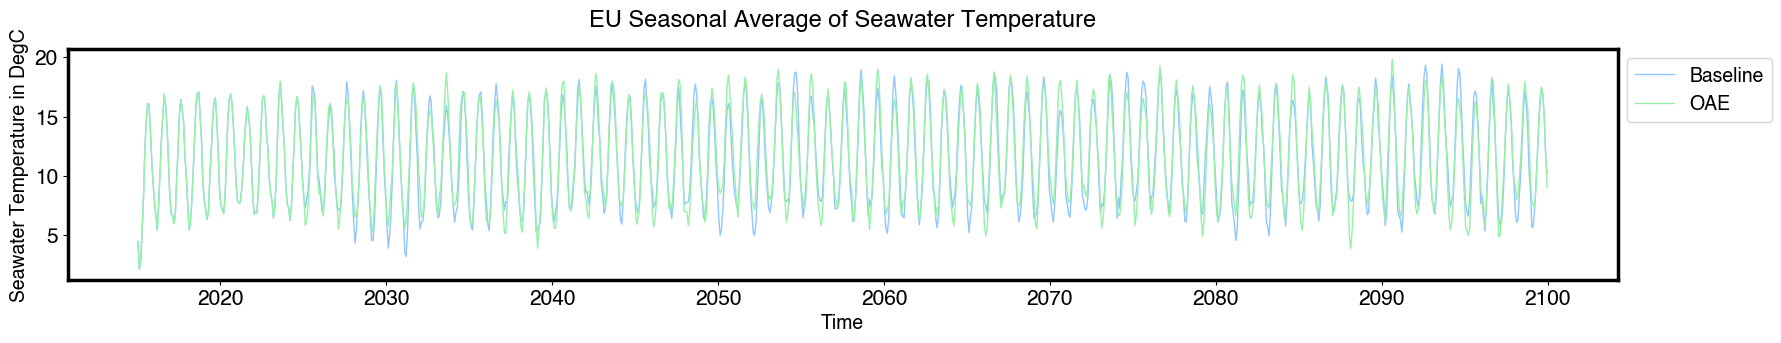

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.votemper, linewidth=1, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.votemper, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Seawater Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Seawater Temperature', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline.votemper.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.votemper.mean(dim=('y', 'x', 'deptht'))

In [15]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

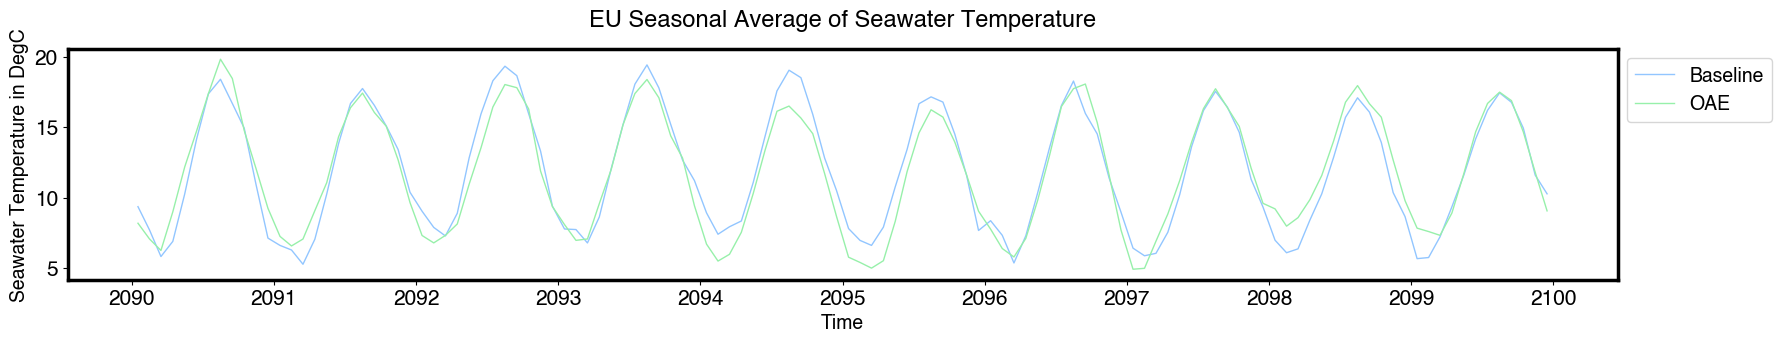

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.votemper, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.votemper, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Seawater Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Seawater Temperature', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of Seawater Temperature

In [17]:
start_date = "2090-01-01"
end_date = "2100-01-01"

votemper_baseline = sliced_data_baseline["votemper"].sel(time_counter=slice(start_date, end_date))

In [18]:
votemper_season_summary_baseline = votemper_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_season_mean_all_years_baseline = votemper_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
votemper_seasonal_mean_baseline = votemper_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [19]:
start_date = "2090-01-01"
end_date = "2100-01-01"

votemper_oae = sliced_data_oae["votemper"].sel(time_counter=slice(start_date, end_date))

In [20]:
votemper_season_summary_oae = votemper_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_season_mean_all_years_oae = votemper_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
votemper_seasonal_mean_oae = votemper_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

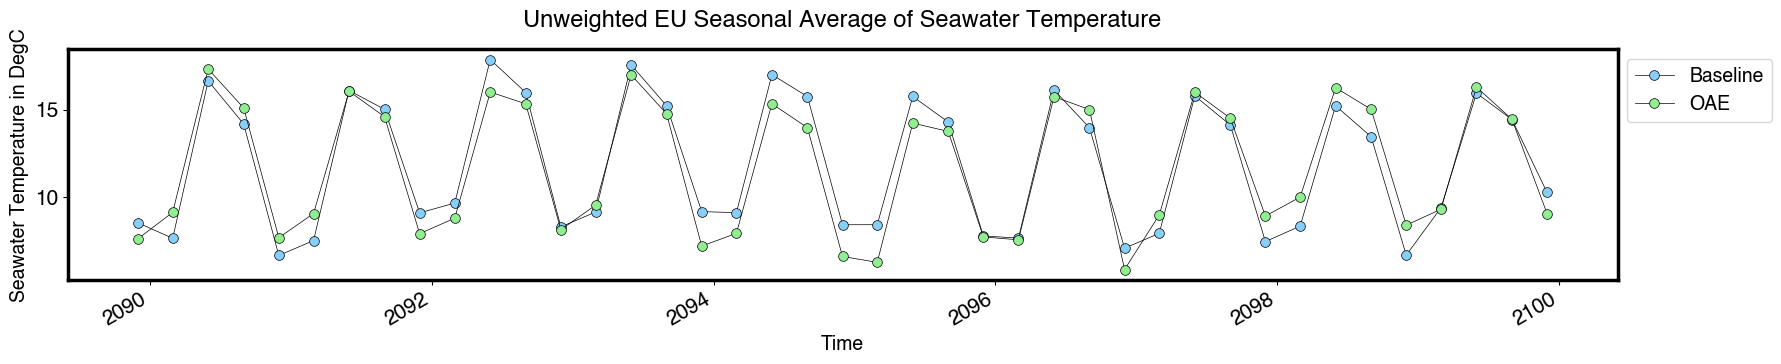

In [21]:
f, ax = plt.subplots(figsize=(20, 3))

votemper_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of Seawater Temperature", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Seawater Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Seawater Temperature

In [22]:
month_length_baseline = votemper_baseline.time_counter.dt.days_in_month
votemper_weighted_mean_baseline = ((votemper_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
votemper_weighted_mean_baseline = votemper_weighted_mean_baseline.where(votemper_weighted_mean_baseline)
votemper_weighted_season_baseline = votemper_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [23]:
month_length_oae = votemper_oae.time_counter.dt.days_in_month
votemper_weighted_mean_oae = ((votemper_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
votemper_weighted_mean_oae = votemper_weighted_mean_oae.where(votemper_weighted_mean_oae)
votemper_weighted_season_oae = votemper_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

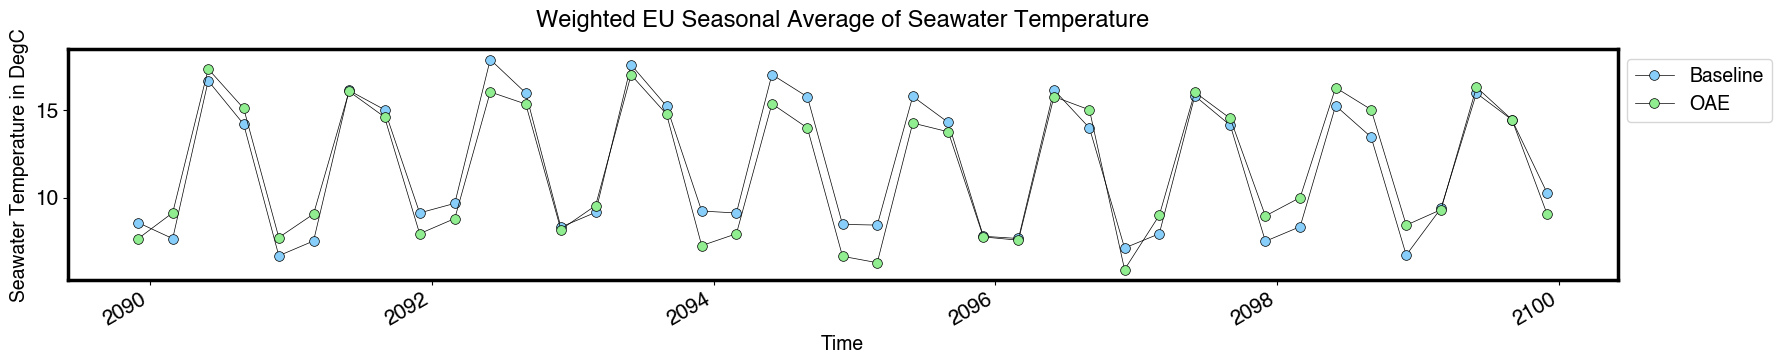

In [24]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
votemper_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of Seawater Temperature", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Seawater Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Seawater Temperature (seasons displayed)

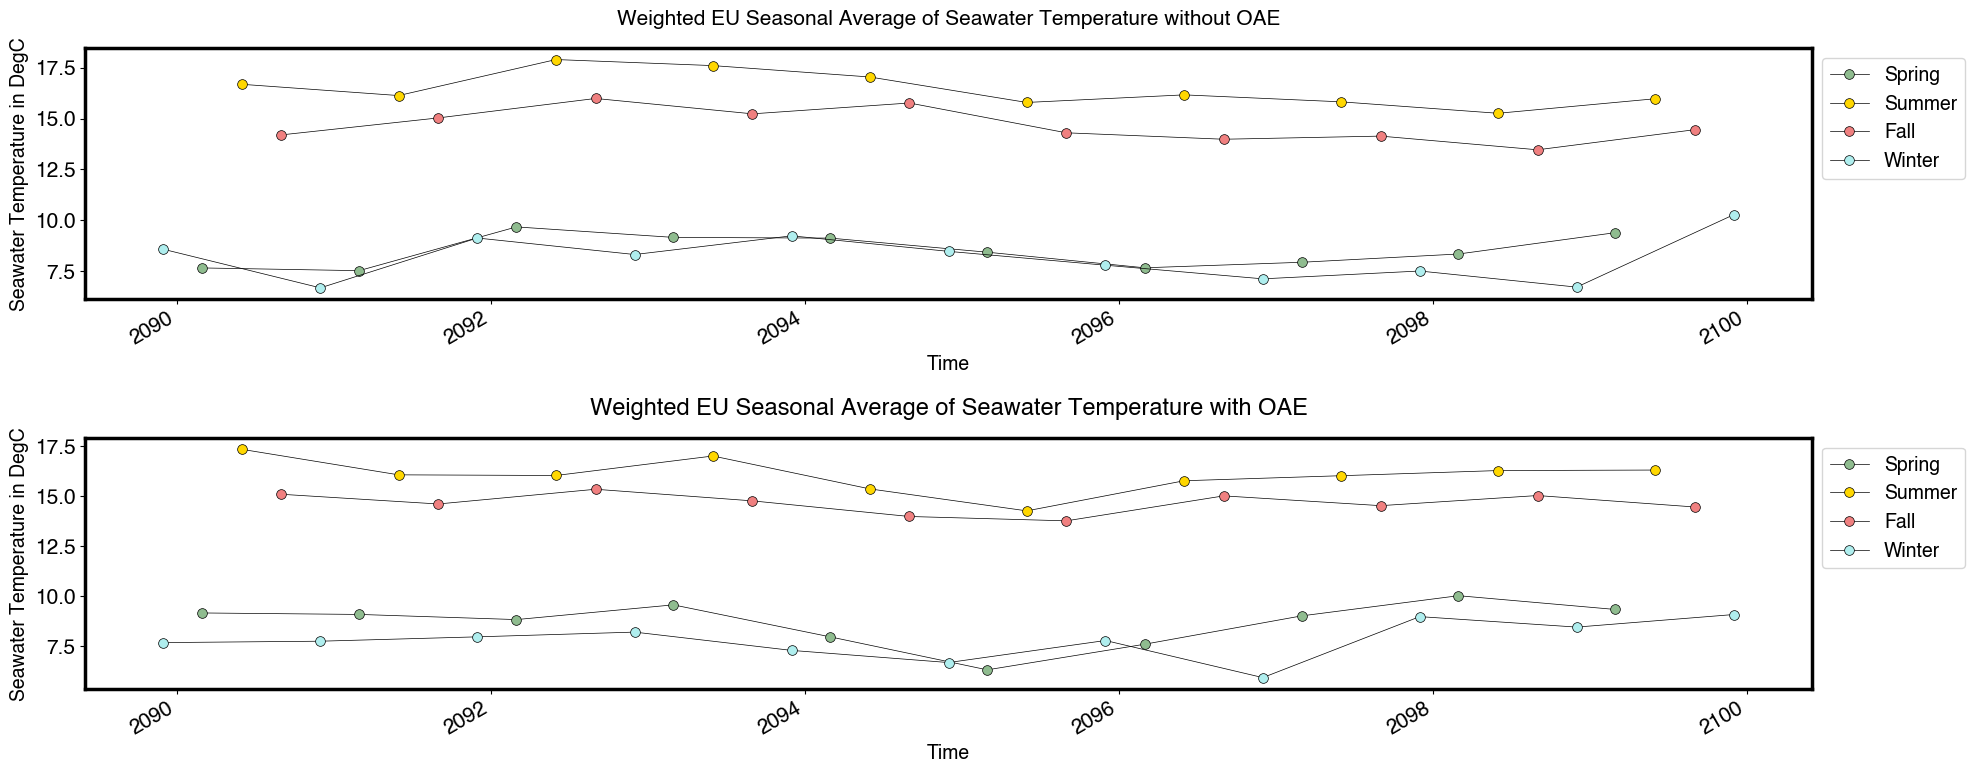

In [25]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in votemper_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of Seawater Temperature without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Seawater Temperature in DegC', fontsize=14)

for month, arr in votemper_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of Seawater Temperature with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Seawater Temperature in DegC', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of Seawater Temperature without OAE (seasons displayed)

In [26]:
votemper_weighted_baseline = votemper_weighted_season_baseline.to_dataframe('votemper_Flux')
votemper_weighted_baseline['Month'] = pd.DatetimeIndex(votemper_weighted_baseline.index).month

In [27]:
conditions = [
    (votemper_weighted_baseline['Month'] == 3),
    (votemper_weighted_baseline['Month'] == 6),
    (votemper_weighted_baseline['Month'] == 9),
    (votemper_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

votemper_weighted_baseline['Month'] = np.select(conditions, values)

In [28]:
colors = dict(zip(votemper_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

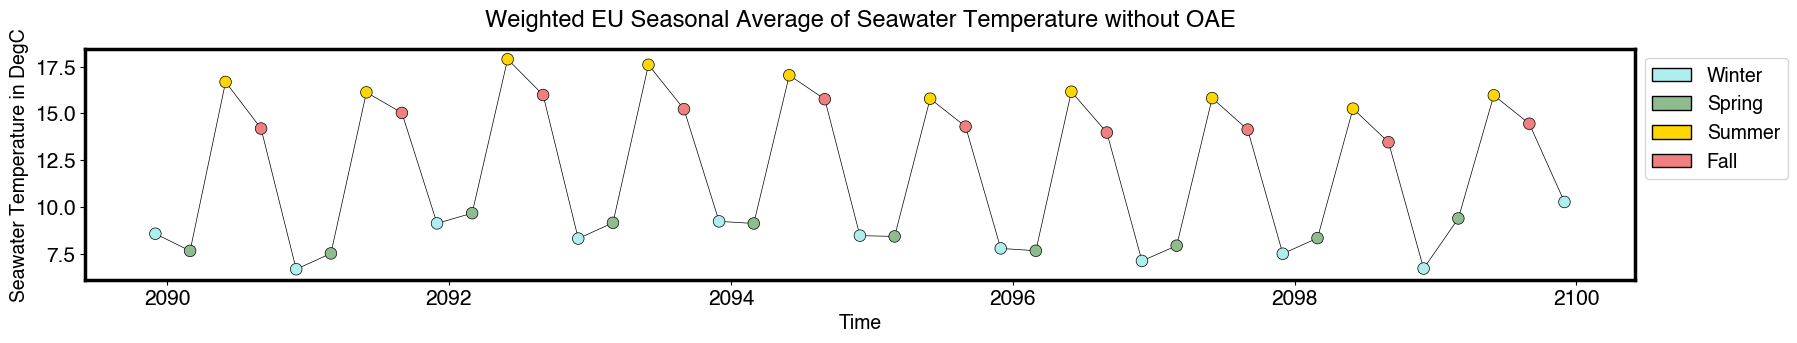

In [29]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper_Flux, color=votemper_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Seawater Temperature without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Seawater Temperature with OAE (seasons displayed)

In [30]:
votemper_weighted_oae = votemper_weighted_season_oae.to_dataframe('votemper_Flux')
votemper_weighted_oae['Month'] = pd.DatetimeIndex(votemper_weighted_oae.index).month

In [31]:
conditions = [
    (votemper_weighted_oae['Month'] == 3),
    (votemper_weighted_oae['Month'] == 6),
    (votemper_weighted_oae['Month'] == 9),
    (votemper_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

votemper_weighted_oae['Month'] = np.select(conditions, values)

In [32]:
colors = dict(zip(votemper_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

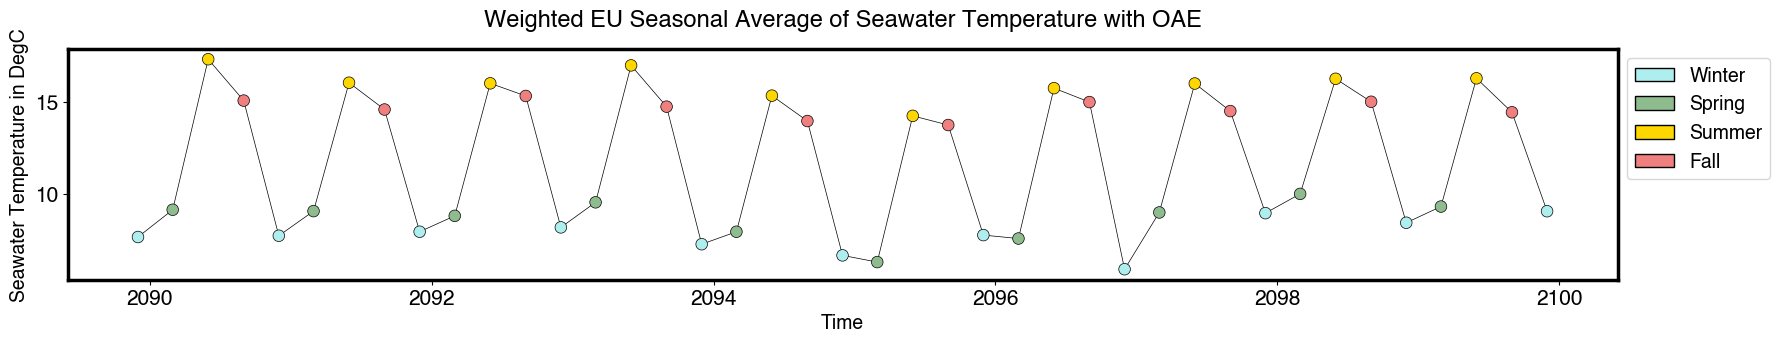

In [33]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_weighted_oae.index, votemper_weighted_oae.votemper_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_oae.index, votemper_weighted_oae.votemper_Flux, color=votemper_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Seawater Temperature with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Seawater Temperature (seasons displayed)

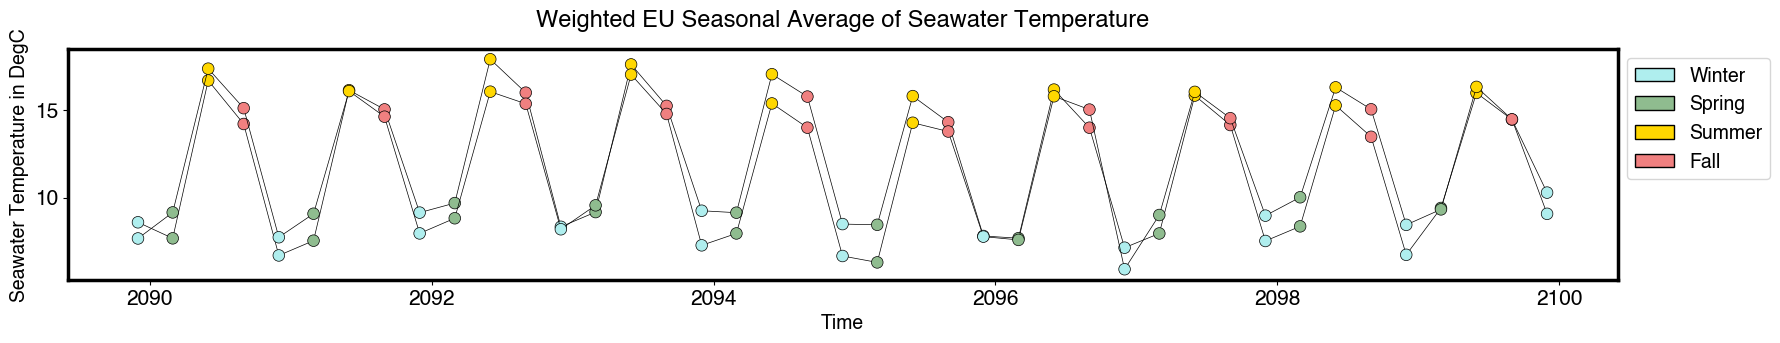

In [34]:
colors = dict(zip(votemper_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(votemper_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_baseline.index, votemper_weighted_baseline.votemper_Flux, color=votemper_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(votemper_weighted_oae.index, votemper_weighted_oae.votemper_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_weighted_oae.index, votemper_weighted_oae.votemper_Flux, color=votemper_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Seawater Temperature", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Seawater Temperature without OAE

In [35]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

votemper_baseline_month = sliced_data_baseline["votemper"].sel(time_counter=slice(start_date_month, end_date_month))

In [36]:
votemper_month_summary_baseline = votemper_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_month_mean_all_years_baseline = votemper_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
votemper_monthly_mean_baseline = votemper_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [37]:
votemper_oae_month = sliced_data_oae["votemper"].sel(time_counter=slice(start_date_month, end_date_month))

In [38]:
votemper_month_summary_oae = votemper_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
votemper_month_mean_all_years_oae = votemper_oae_month.resample(time_counter='M').mean(keep_attrs=True)
votemper_monthly_mean_oae = votemper_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

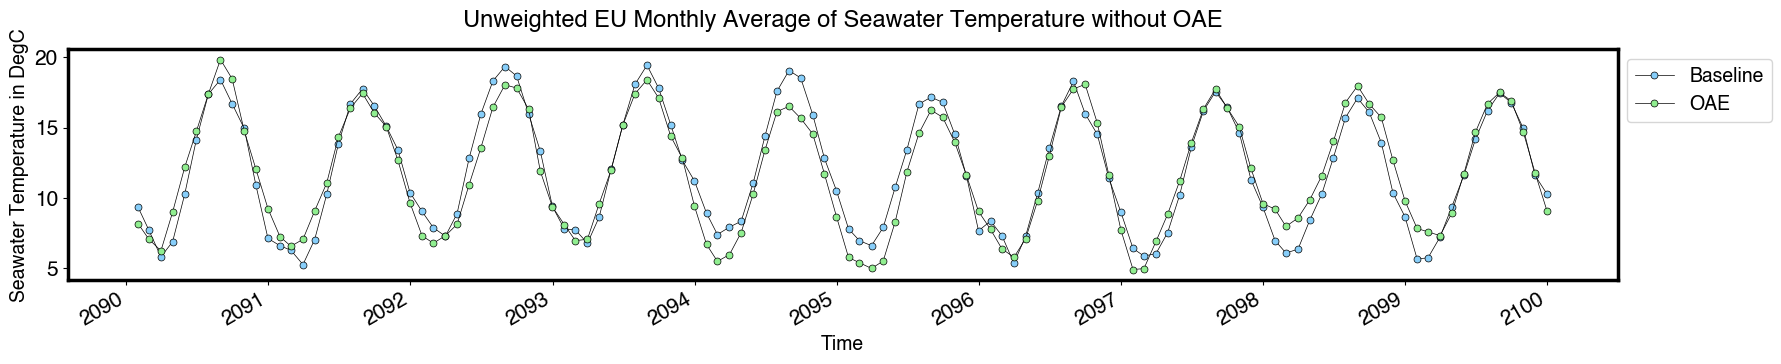

In [39]:
f, ax = plt.subplots(figsize=(20, 3))

votemper_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

votemper_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of Seawater Temperature without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Seawater Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of Seawater Temperature without OAE (months displayed)

In [40]:
votemper_baseline_monthly = votemper_monthly_mean_baseline.to_dataframe('votemper')
votemper_baseline_monthly['Month'] = pd.DatetimeIndex(votemper_baseline_monthly.index).month

In [41]:
conditions = [
    (votemper_baseline_monthly['Month'] == 1),
    (votemper_baseline_monthly['Month'] == 2),
    (votemper_baseline_monthly['Month'] == 3),
    (votemper_baseline_monthly['Month'] == 4),
    (votemper_baseline_monthly['Month'] == 5),
    (votemper_baseline_monthly['Month'] == 6),
    (votemper_baseline_monthly['Month'] == 7),
    (votemper_baseline_monthly['Month'] == 8),
    (votemper_baseline_monthly['Month'] == 9),
    (votemper_baseline_monthly['Month'] == 10),
    (votemper_baseline_monthly['Month'] == 11),
    (votemper_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

votemper_baseline_monthly['Month'] = np.select(conditions, values)

In [42]:
colors = dict(zip(votemper_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

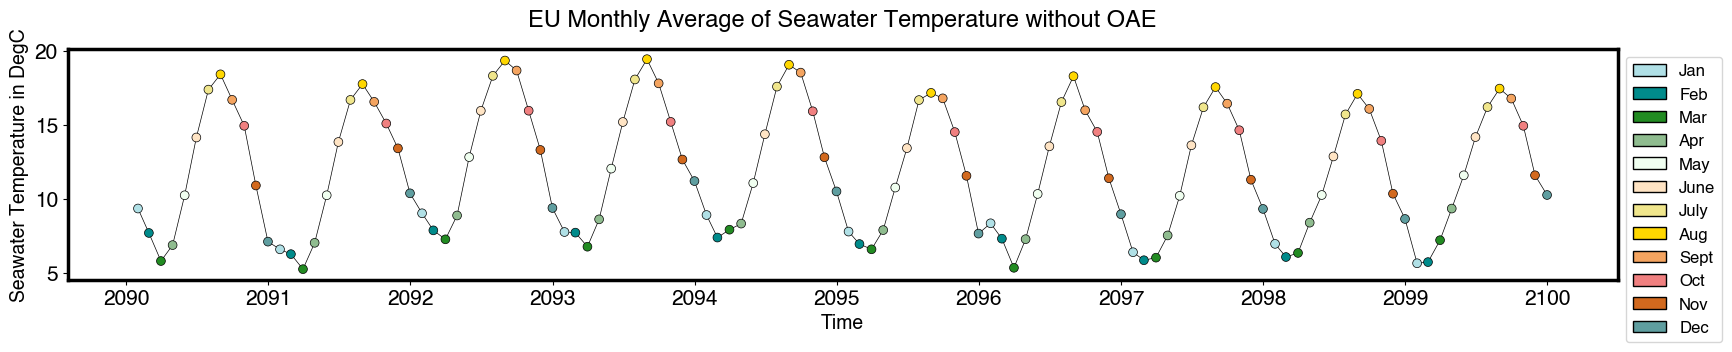

In [43]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, color=votemper_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("EU Monthly Average of Seawater Temperature without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Seawater Temperature with OAE (months displayed)

In [44]:
votemper_oae_monthly = votemper_monthly_mean_oae.to_dataframe('votemper')
votemper_oae_monthly['Month'] = pd.DatetimeIndex(votemper_oae_monthly.index).month

In [45]:
conditions = [
    (votemper_oae_monthly['Month'] == 1),
    (votemper_oae_monthly['Month'] == 2),
    (votemper_oae_monthly['Month'] == 3),
    (votemper_oae_monthly['Month'] == 4),
    (votemper_oae_monthly['Month'] == 5),
    (votemper_oae_monthly['Month'] == 6),
    (votemper_oae_monthly['Month'] == 7),
    (votemper_oae_monthly['Month'] == 8),
    (votemper_oae_monthly['Month'] == 9),
    (votemper_oae_monthly['Month'] == 10),
    (votemper_oae_monthly['Month'] == 11),
    (votemper_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

votemper_oae_monthly['Month'] = np.select(conditions, values)

In [46]:
colors = dict(zip(votemper_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

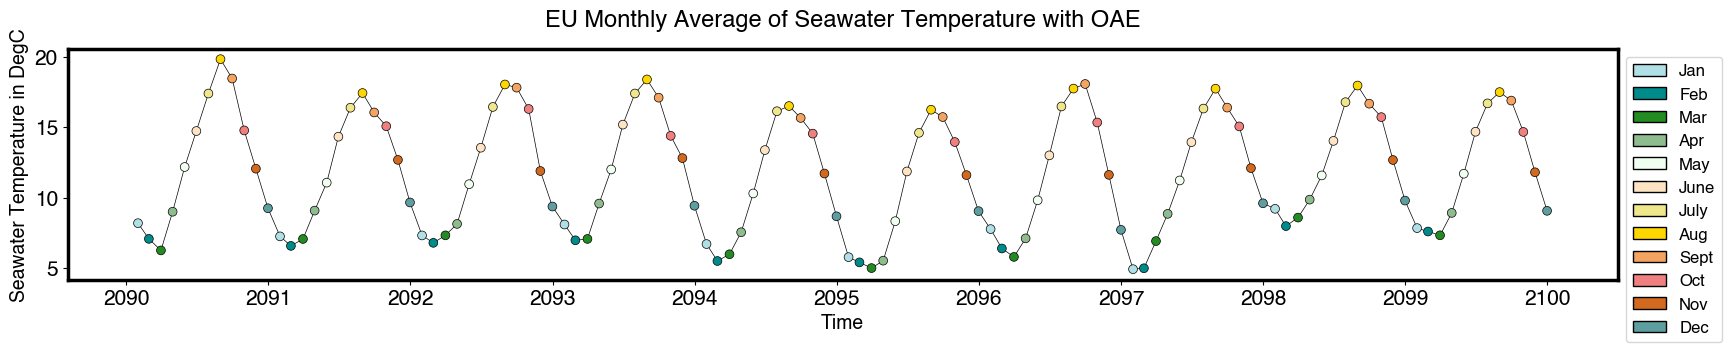

In [47]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(votemper_oae_monthly.index, votemper_oae_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_oae_monthly.index, votemper_oae_monthly.votemper, color=votemper_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("EU Monthly Average of Seawater Temperature with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Seawater Temperature (months displayed)

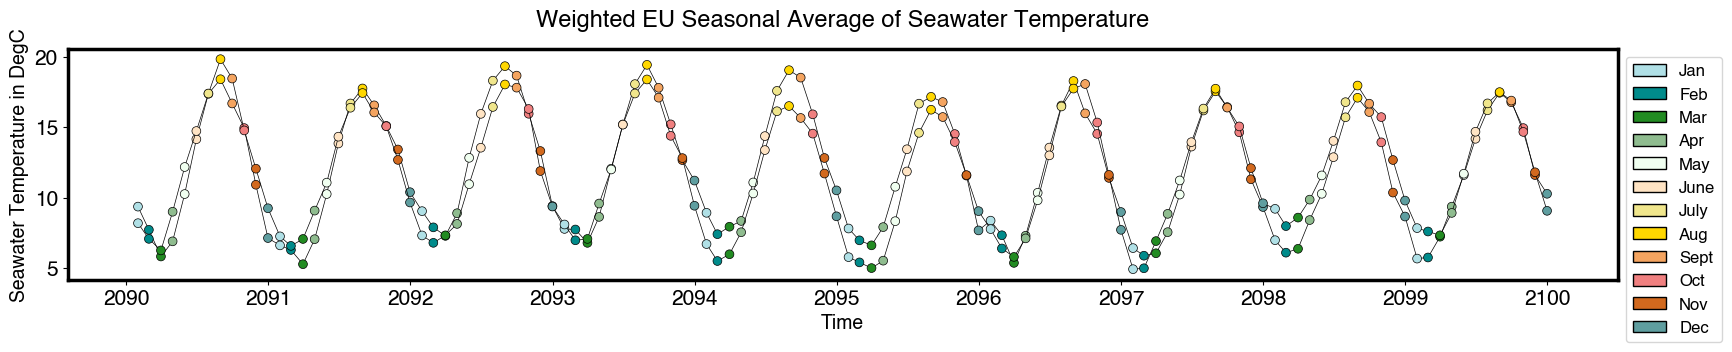

In [48]:
colors = dict(zip(votemper_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, color=votemper_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(votemper_oae_monthly.index, votemper_oae_monthly.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(votemper_oae_monthly.index, votemper_oae_monthly.votemper, color=votemper_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Seawater Temperature", fontsize=17, y=1.06)

pass

### Δ Seawater Temperature between Baseline and OAE from 2090 to 2100

In [49]:
delta_votemper = votemper_oae_monthly.votemper - votemper_baseline_monthly.votemper

In [50]:
delta_votemper = delta_votemper.to_xarray()

In [51]:
delta_votemper = delta_votemper.to_dataframe('votemper')
delta_votemper['Month'] = pd.DatetimeIndex(delta_votemper.index).month

In [52]:
conditions = [
    (delta_votemper['Month'] == 1),
    (delta_votemper['Month'] == 2),
    (delta_votemper['Month'] == 3),
    (delta_votemper['Month'] == 4),
    (delta_votemper['Month'] == 5),
    (delta_votemper['Month'] == 6),
    (delta_votemper['Month'] == 7),
    (delta_votemper['Month'] == 8),
    (delta_votemper['Month'] == 9),
    (delta_votemper['Month'] == 10),
    (delta_votemper['Month'] == 11),
    (delta_votemper['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_votemper['Month'] = np.select(conditions, values)

In [53]:
colors = dict(zip(delta_votemper.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

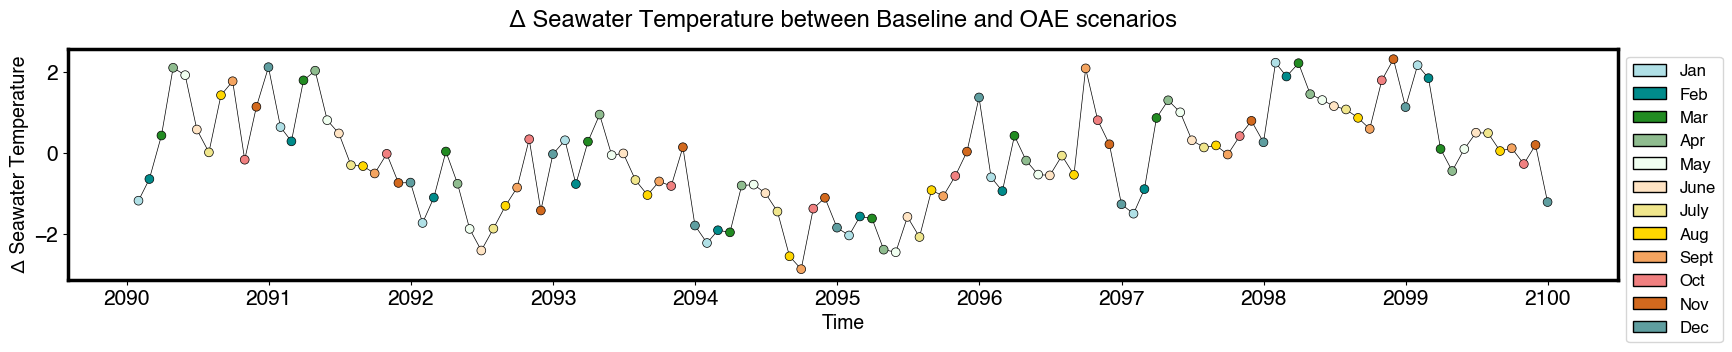

In [54]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_votemper.index, delta_votemper.votemper, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_votemper.index, delta_votemper.votemper, color=delta_votemper.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Seawater Temperature', fontsize=14)
ax.set_title("Δ Seawater Temperature between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

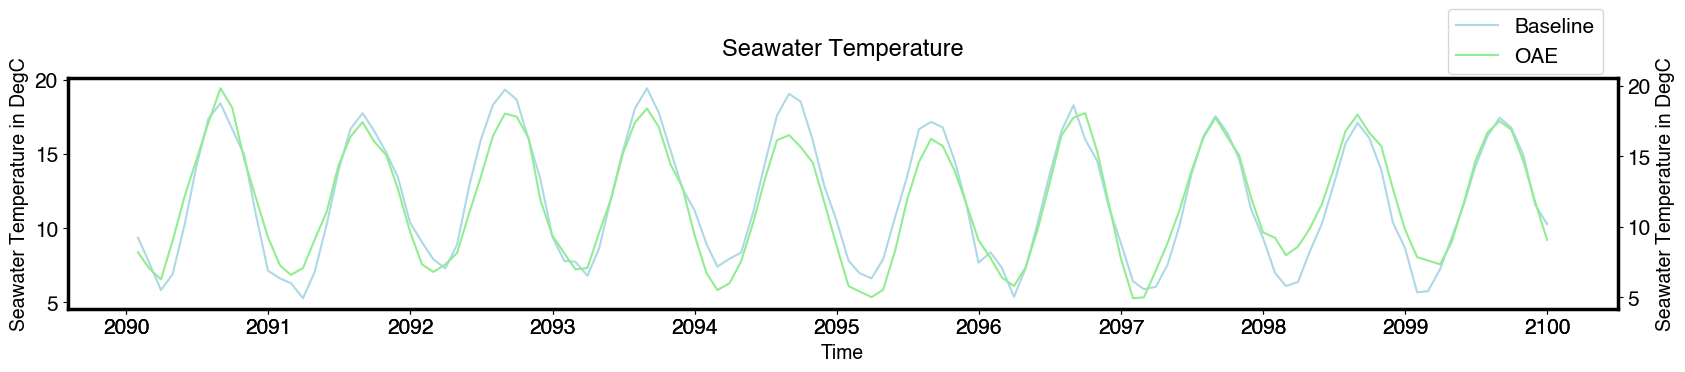

In [55]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(votemper_baseline_monthly.index, votemper_baseline_monthly.votemper, linewidth=1.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('Seawater Temperature in DegC', fontsize=14)

ax2.plot(votemper_oae_monthly.index, votemper_oae_monthly.votemper, linewidth=1.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Seawater Temperature in DegC', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('Seawater Temperature', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()